In [44]:
from typing import *
from dataclasses import dataclass
import matplotlib.pyplot as plt

@dataclass
class Point:
  x: int
  y: int

  @classmethod
  def fromlist(cls, point: List[int]) -> 'Point':
    if len(point) > 2:
      raise ValueError("Invalid point")
    return cls(*point)

  def __lt__(self, obj: 'Point'):
    return (self.x, self.y) < (obj.x, obj.y)
  
  def __eq__(self, obj: 'Point'):
    return (self.x, self.y) == (obj.x, obj.y)

def diff(a: Point, b: Point) -> Point:
  return Point(x=a.x - b.x, y=a.y - b.y)

def orientation(a: Point, b: Point, c: Point) -> Literal[-1, 0, 1]:
  ab = diff(b, a)
  ac = diff(c, a)

  sign = ab.x * ac.y - ac.x * ab.y

  if sign > 0:
    return 1
  elif sign < 0:
    return -1
  return 0

def onsegment(a: Point, c: Point, b: Point) -> bool:
  return min(a.x, b.x) <= c.x <= max(a.x, b.x) and\
         min(a.y, b.y) <= c.y <= max(a.y, b.y)

def intersection(A: Tuple[Point, Point], B: Tuple[Point, Point]) -> bool:
  p1, p2 = A
  q1, q2 = B
  o1 = orientation(p1, q1, p2)
  o2 = orientation(p1, q1, q2)
  o3 = orientation(p2, q2, p1)
  o4 = orientation(p2, q2, q1)

  if o1 != o2 and o3 != o4:
      return True

  return (o1 == 0 and onsegment(p1, q1, p2)) or \
        (o2 == 0 and onsegment(p1, q2, p2)) or \
        (o3 == 0 and onsegment(q1, p1, q2)) or \
        (o4 == 0 and onsegment(q1, p2, q2))

def jarvismarch(points: List[Point]) -> List[Point]:
  n = len(points)

  min_i = min(range(n), key=points.__getitem__)
  hull = []
  p, q = min_i, 0
  while True:
    hull.append(p)
    q = (p + 1) % n
    for i, pt in enumerate(points):
      if orientation(points[p], pt, points[q]) < 0:
        q = i
    p = q

    if p == min_i:
      break

  return list(map(points.__getitem__, hull))

def grahamscan(points: List[Point]) -> List[Point]:
  p0 = min(points)
  
  print(p0)

points = list(map(Point.fromlist, [
  [0, 0], [1, -4], [-1, -5], [-5, -3], [-3, -1],
  [-1, -3], [-2, -2], [-1, -1], [-2, -1], [-1, 1]
]))
hull = grahamscan(points)

Point(x=-5, y=-3)


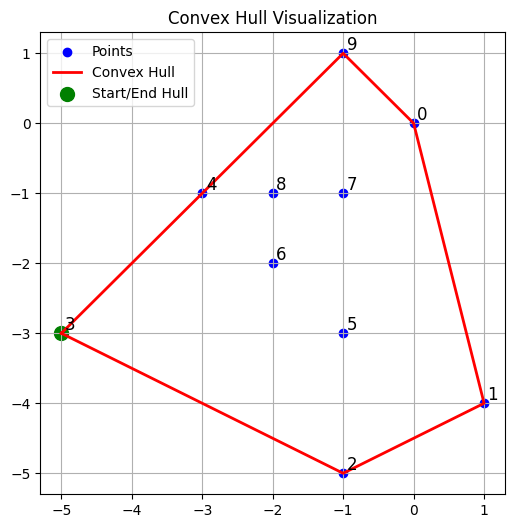

In [41]:
# Use your existing points and hull
points = list(map(Point.fromlist, [
  [0, 0], [1, -4], [-1, -5], [-5, -3], [-3, -1],
  [-1, -3], [-2, -2], [-1, -1], [-2, -1], [-1, 1]
]))
hull = jarvismarch(points)

# Extract x and y coordinates for points
x = [p.x for p in points]
y = [p.y for p in points]

# Extract hull coordinates, close the polygon by repeating the first point
hx = [p.x for p in hull] + [hull[0].x]
hy = [p.y for p in hull] + [hull[0].y]

plt.figure(figsize=(6,6))
plt.scatter(x, y, color='blue', label='Points')
plt.plot(hx, hy, color='red', linewidth=2, label='Convex Hull')
plt.scatter([hull[0].x], [hull[0].y], color='green', s=100, label='Start/End Hull')
for i, p in enumerate(points):
    plt.text(p.x+0.05, p.y+0.05, f'{i}', fontsize=12)
plt.legend()
plt.grid(True)
plt.title('Convex Hull Visualization')
plt.show()